# SMAI Assignment - 2

## Question - `2` : Face Recognition using Principal Component Analysis

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


#### Import Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [3]:
path = "./ATnT/"
X = []
y = []
for i in range(1,41):
    for j in range(1,11):
        img = cv2.imread(f"{path}s{i}/{j}.pgm", cv2.IMREAD_GRAYSCALE)
        X.append(img)
        y.append(i)
        


In [4]:
X[0].shape

(112, 92)

In [5]:
X = np.vectorize(lambda x : x.flatten(), signature='(n,m)->(k)')(X)

In [6]:
X.shape

(400, 10304)

In [7]:
y = np.array(y)

In [8]:
print(f'X: {X.shape}')
print(f'y: {y.shape}')
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y,random_state=1)

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print()

print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')
print()

X: (400, 10304)
y: (400,)

X_train: (300, 10304)
y_train: (300,)

X_test: (100, 10304)
y_test: (100,)



In [9]:
len(np.unique(y_train))

40

In [10]:
len(np.unique(y_test))

40

#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.


1. Find the mean face
2. Normalize face matrix
3. Find Covariance Matrix
4. Find eigen values and eigen vectors
5. Sort the eigen values and return the eigen vectors corresponding to the top n_components eigen values.

In [11]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""
def principalComponentAnalysis(X, n_components):
  mean_face = X.mean(axis=0)
  X = X - mean_face # normalize
  S = np.cov(X,rowvar=False)# covariance matrix
  eigenvalues, eigenvectors = np.linalg.eigh(S)
  all_eigen_faces = []
  for n in n_components:
    eigen_faces = np.array(list(map(lambda x : x[1],list(zip(eigenvalues,eigenvectors.T))[::-1]))[:n])
    all_eigen_faces.append(eigen_faces)
  return mean_face,all_eigen_faces

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.


1. Take dot product of mean subtracted images with eigen faces to get weights correspoding to each eigen face. 
2. get the weighted sum of each eigen faces to get back the reconstructed image

In [12]:
# Function to implement image reconstruction by taking arguements as necessary.
def project(images,eigen_faces,mean_face):
  return eigen_faces @ (images - mean_face).T  
def imageReconstruction(images,mean_face,eigen_faces):
  
  
  weights = project(images,eigen_faces,mean_face)
  
  
  return weights.T @ eigen_faces

#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

In [13]:
X_train.shape

(300, 10304)

In [14]:
n_components = [5,10,100,1000,5000,10304]
mean_face,all_eigen_faces = principalComponentAnalysis(X_train,n_components)

In [33]:
img = X_train[0]

In [34]:
imgs = [imageReconstruction(img,mean_face,eigen_faces) for eigen_faces in all_eigen_faces]

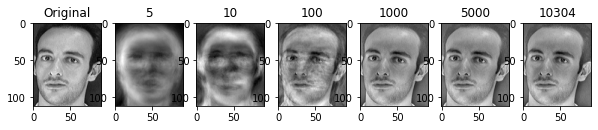

In [35]:


fig,axes = plt.subplots(1,7,figsize=(10,6))
axes[0].imshow(img.reshape(112,92),cmap='gray')
axes[0].set_title("Original")
for i,img in enumerate(imgs):
    
    axes[i+1].imshow(img.reshape(112,92),cmap='gray')
    axes[i+1].set_title(str(n_components[i]))


#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.



1. Images that have lower distance between their weights are similar
2. We find weights of both train and test images
3. for each test image, we find the train image with the least distance
4. label associated with this trian image is the predicted label for the test image

In [36]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""

def match(train_weights,test_weight):
  distance = np.linalg.norm(train_weights.T - test_weight, axis=1)
  return np.argmin(distance)

def get_mse(original,constructed):
  return np.mean(np.linalg.norm(original - constructed, axis=1))

def model(X_train,y_train,X_test,eigen_faces,mean_face):
  train_weights = project(X_train,eigen_faces,mean_face) #weights associated with train images
  test_weights = project(X_test,eigen_faces,mean_face) #weights associated with test images
  

  indexes = [match(train_weights,test_weight) for test_weight in test_weights.T] # for each test image find the closest matching train image index
  closest_match = X_train[indexes,:]
  erros = get_mse(closest_match,X_test)
  predictions = y_train[indexes]
  return closest_match,erros,predictions
 

In [37]:
mse_train = []
accuracies = []
for eigen_faces in all_eigen_faces:
    closer_images,error,predictions = model(X_train,y_train,X_test,eigen_faces,mean_face)
    mse_train.append(error)
    accuracies.append(accuracy_score(predictions,y_test))

In [38]:
mse_test = [get_mse(X_test,imageReconstruction(X_test,mean_face,eigen_faces))for eigen_faces in all_eigen_faces]

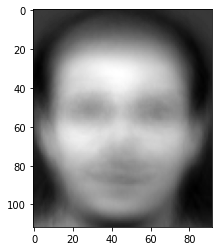

In [39]:
# visualizing mean face
plt.imshow(mean_face.reshape(112,92),cmap='gray')

In [22]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""

'\nIterate through all the images in the test data and \ntest the accurate by taking different number of components\n'

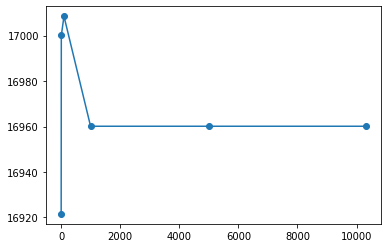

In [40]:
# Plot Number of eigenvectors vs Mean Square Error
plt.plot(n_components,mse_train,marker='o',linestyle='solid')

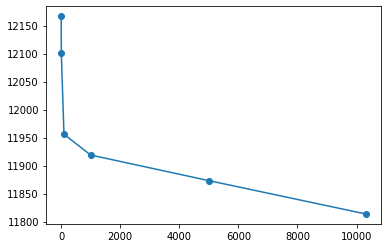

In [41]:
# Plot Number of eigenvectors vs Mean Square Error
plt.plot(n_components,mse_test,marker='o',linestyle='solid')

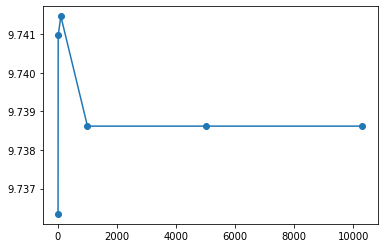

In [42]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error
plt.plot(n_components,np.log(mse_train),marker='o',linestyle='solid')

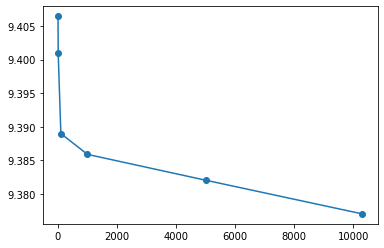

In [44]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error
plt.plot(n_components,np.log(mse_test),marker='o',linestyle='solid')

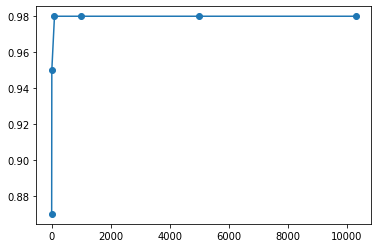

In [45]:
plt.plot(n_components,accuracies,marker='o',linestyle='solid')

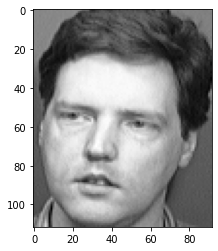

In [47]:
plt.imshow(closer_images[0].reshape(112,92),cmap='gray')

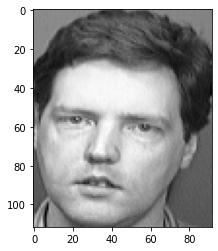

In [48]:
plt.imshow(X_test[0].reshape(112,92),cmap='gray')

In [46]:
import numpy as np



np.where(predictions!=y_test)[0]

array([49, 98])

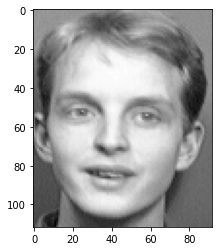

In [49]:
plt.imshow(closer_images[49].reshape(112,92),cmap='gray')

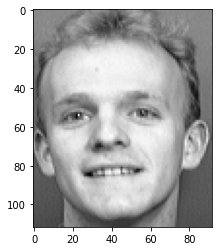

In [50]:
plt.imshow(X_test[49].reshape(112,92),cmap='gray')

It is generally true that increasing the number of components in eigenfaces can provide better performance for facial recognition or other computer vision tasks. The more components that are used, the more information is captured and the better the reconstruction can be.

However, there is a point of diminishing returns, where the additional information provided by the extra components is not significant enough to improve the performance of the system. After this point, adding more components can actually lead to overfitting and decreased performance on new data.

Therefore, it is important to carefully select the number of components to use for each specific task. This can be done by analyzing the trade-off between the number of components and the performance of the system

**Answer:**

State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

**Answer:**
Principal Component Analysis (PCA) is a powerful technique for dimensionality reduction that can be used to reduce the information in a large vector space to a smaller number of dimensions. By choosing the eigenvectors with the largest eigenvalues, we can capture most of the variance in the data in very few dimensions.

In the context of face recognition, PCA has been widely used for feature extraction and dimensionality reduction. However, it can fall short in accurately capturing the variance in the faces with a smaller number of components, leading to loss of information and degraded performance.

Furthermore, PCA-based face recognition systems are highly sensitive to variations in the underlying distribution of the data, such as changes in lighting conditions, pose, and facial expressions. Even the slightest shift in the distribution can lead to significant changes in the eigenvectors and degrade the performance of the system.